In [1]:
# Dependencies
import pandas as pd                     # for handling and structuring data
import matplotlib.pyplot as plt         # for creating plots
import scipy.stats as st                # for statistical functions
import numpy as np                      # for generating random numbers and handling numerical operations
from scipy.stats import linregress      # for calculating linear regression

# need to switch to csv
# Load the Excel file
file_path = 'Most Streamed Spotify Songs 2024 - Research.xlsx'
xls = pd.ExcelFile(file_path)

# Display sheet names to identify relevant data
print(xls.sheet_names)


['Views', 'Likes', 'Most Streamed Spotify Songs 202']


In [2]:
# Load the 'Likes' sheet
likes_df = pd.read_excel(xls, sheet_name='Likes', skiprows=2)

# Rename 'Row Labels' column
likes_df.rename(columns={'Row Labels': 'Song Title'}, inplace=True)

# Load the 'Views' sheet
views_df = pd.read_excel(xls, sheet_name='Views', skiprows=2)
views_df.rename(columns={'Row Labels': 'Song Title'}, inplace=True)

most_streamed_df = pd.read_excel(xls, sheet_name='Most Streamed Spotify Songs 202')

views_df.head()

,Song Title,Max of Spotify Popularity,Min of All Time Rank,Sum of Spotify Streams,Sum of YouTube Views,Sum of TikTok Views
0,Monkeys Spinning Monkeys,36.0,1018,11477477.0,11457166.0,2.332323e+11
1,Love You So,44.0,1918,16326628.0,7603329.0,2.148440e+11
2,Oh No,41.0,473,40284121.0,17978707.0,6.108856e+10
3,Funny Song,39.0,1539,5866282.0,11793478.0,3.994631e+10
4,Aesthetic,44.0,114,33025746.0,6658234.0,3.985063e+10


In [3]:
# Ensure that the key columns have consistent names across DataFrames to facilitate merging
likes_df.rename(columns={'Song Title': 'Song'}, inplace=True)
views_df.rename(columns={'Song Title': 'Song'}, inplace=True)

# Select relevant columns
likes_df = likes_df[['Song', 'Sum of TikTok Likes', 'Sum of YouTube Likes']]
views_df = views_df[['Song', 'Max of Spotify Popularity', 'Sum of Spotify Streams', 'Sum of YouTube Views', 'Sum of TikTok Views']]

views_df.head()

,Song,Max of Spotify Popularity,Sum of Spotify Streams,Sum of YouTube Views,Sum of TikTok Views
0,Monkeys Spinning Monkeys,36.0,11477477.0,11457166.0,2.332323e+11
1,Love You So,44.0,16326628.0,7603329.0,2.148440e+11
2,Oh No,41.0,40284121.0,17978707.0,6.108856e+10
3,Funny Song,39.0,5866282.0,11793478.0,3.994631e+10
4,Aesthetic,44.0,33025746.0,6658234.0,3.985063e+10


In [4]:
# Combine the two DataFrames based on the 'Song' column
merged_df = pd.merge(likes_df, views_df, on='Song', how='inner')

merged_df.head()

,Song,Sum of TikTok Likes,Sum of YouTube Likes,Max of Spotify Popularity,Sum of Spotify Streams,Sum of YouTube Views,Sum of TikTok Views
0,Without Me,2.354115e+08,38043329.0,83.0,6.336157e+09,4.304317e+09,2.394606e+09
1,Blinding Lights,3.373226e+08,10093211.0,83.0,8.542797e+09,8.338071e+08,3.501177e+09
2,goosebumps,2.049043e+08,13556723.0,82.0,2.892012e+09,1.413468e+09,1.899768e+09
3,Heat Waves,5.133344e+08,14947520.0,82.0,2.996181e+09,1.272898e+09,5.518430e+09
4,STAY (with Justin Bieber),2.246991e+09,14661425.0,78.0,6.214201e+09,1.256974e+09,2.371238e+10


In [13]:
# Remove rows with missing values
merged_df.dropna(inplace=True)

# Formatting numbers for easy reading 
def format_number(num):
    if abs(num) >= 1_000_000_000:
        return f"{num/1_000_000_000:.1f}B"
    elif abs(num) >= 1_000_000:
        return f"{num/1_000_000:.1f}M"
    elif abs(num) >= 1_000:
        return f"{num/1_000:.1f}K"
    else:
        return f"{num:.1f}"

# Define the columns you want to format
columns_to_format = ['Sum of TikTok Likes', 'Sum of YouTube Likes', 'Sum of Spotify Streams', 'Sum of YouTube Views', 'Sum of TikTok Views']
#formatted_df = merged_df.loc[['Sum of TikTok Likes', 'Sum of YouTube Likes', 'Sum of Spotify Streams', 'Sum of YouTube Views', 'Sum of TikTok Views']]

# Apply the formatting to columns
#for col in columns_to_format:
 #  formatted_df[col] = formatted_df[col].apply(format_number)

# Display the updated DataFrame
formatted_df

,Song,Sum of TikTok Likes,Sum of YouTube Likes,Max of Spotify Popularity,Sum of Spotify Streams,Sum of YouTube Views,Sum of TikTok Views
0,Without Me,235.4M,38.0M,83.0,6.3B,4.3B,2.4B
1,Blinding Lights,337.3M,10.1M,83.0,8.5B,833.8M,3.5B
2,goosebumps,204.9M,13.6M,82.0,2.9B,1.4B,1.9B
3,Heat Waves,513.3M,14.9M,82.0,3.0B,1.3B,5.5B
4,STAY (with Justin Bieber),2.2B,14.7M,78.0,6.2B,1.3B,23.7B
...,...,...,...,...,...,...,...
4154,Joy (In My Own Time) - Tribe Song,807.0,300.6K,3.0,6.3K,371.6M,29.3K
4161,Hands,188.0,7.2M,1.0,126.9K,2.4B,6.4K
4165,Semangat Kerjanya Kawan,8.9M,373.0,1.0,32.6K,50.4K,235.9M
4186,Eid,20.0M,318.2K,4.0,10.8K,20.8M,274.5M


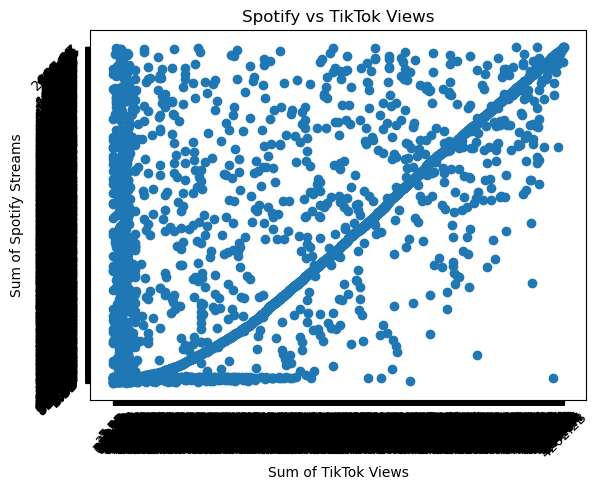

In [6]:
# this cell runs foreverrrrr (¬_¬")

# Spotify vs TikTok Views
# Does high TikTok views correlate to high spotify streams?

# Create a scatterplot
plt.scatter(merged_df['Sum of TikTok Views'], merged_df['Sum of Spotify Streams'])
plt.xlabel('Sum of TikTok Views')
plt.ylabel('Sum of Spotify Streams')
plt.title('Spotify vs TikTok Views')
# What kind of editting can be done to make the tick labels not smush together??
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


In [7]:
# Does the top 500 most viewed TikTok songs have high spotify streaming?

# Create a bar chat

# Sort DataFrame by TikTok Views in descending order
top_500_tiktok_df = merged_df.sort_values(by='Sum of TikTok Views', ascending=False).head(501)

# Remove the 'Grand Total' row
top_500_tiktok_df = top_500_tiktok_df[top_500_tiktok_df['Song'] != 'Grand Total']

# Display top 500 TikTok-viewed songs with their Spotify Streams
top_500_tiktok_df[['Song', 'Sum of TikTok Views', 'Sum of Spotify Streams']]


,Song,Sum of TikTok Views,Sum of Spotify Streams
987,223's (feat. 9lokknine),999.4M,484.5M
1482,Bad Blood,998.8M,602.3M
2044,What is Love,995.5M,442.9M
1726,Big Energy,994.6M,324.2M
2061,Ahora Me Llama,99.9M,338.8M
...,...,...,...
1760,DDU-DU DDU-DU,683.8M,701.7M
2652,"Mnike (feat. DJ Maphorisa, Nandipha808, Ceeka ...",681.5M,54.6M
63,I Gotta Feeling,681.0M,1.4B
1710,Be Like That - feat. Swae Lee & Khalid,68.9M,409.4M


In [ ]:
# Spotify vs TikTok Views
# Does high TikTok views correlate to high spotify streams?

# Create a scatterplot
plt.scatter(top_500_tiktok_df['Sum of TikTok Views'], top_500_tiktok_df['Sum of Spotify Streams'])
plt.xlabel('Sum of TikTok Views')
plt.ylabel('Sum of Spotify Streams')
plt.title('Spotify vs TikTok Views')
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.show()

In [ ]:
# Add the linear regression equation and line to plot
x_values = top_500_tiktok_df["Sum of TikTok Views"]
y_values = top_500_tiktok_df["Sum of Spotify Streams"]

#the output will be a tuple of multiple values  for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

#the scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.xlabel("Sum of TikTok Views")
plt.ylabel("Sum of Spotify Streams")
plt.title("Spotify vs TikTok Views")

plt.show()

print(f"The r^2-value is: {rvalue**2}")

In [ ]:
# Does the top 10 most viewed TikTok songs have high spotify streaming?

# Create a bar chat

# Sort DataFrame by TikTok Views in descending order
top_ten_tiktok_df = top_500_tiktok_df.sort_values(by='Sum of TikTok Views', ascending=False).head(10)

# Display top 10 TikTok-viewed songs with their Spotify Streams
top_ten_tiktok_df[['Song', 'Sum of TikTok Views', 'Sum of Spotify Streams']]


In [ ]:
# Create a bar chart comparing percentages of TikTok Views and Spotify streaming

# Calculate the percentages
total_tiktok = top_ten_tiktok_df['Sum of TikTok Views'].sum()     # find the total sum first
total_spotify  = top_ten_tiktok_df['Sum of TikTok Views'].sum()

# Convert each song into a percentage of the total
top_ten_tiktok_df['TikTok Percentage'] = (top_ten_tiktok_df['Sum of TikTok Views'] / total_tiktok) * 100
top_ten_tiktok_df['Spotify Percentage'] = (top_ten_tiktok_df['Sum of Spotify Streams'] / total_spotify) * 100

top_ten_tiktok_df

In [ ]:
# Prepare the bar chart
x = np.arange(len(top_ten_tiktok_df['Song']))  # the label locations
width = 0.25                                   # the width of the bars

# Create the subplot
fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')   # constrained to prevent overlap

# Plot the bars
tiktok_bar = ax.bar(x-width/2, top_ten_tiktok_df['Sum of TikTok Views'], width, label='Sum of TikTok Views', color='blue')
spotify_bar = ax.bar(x+width/2, top_ten_tiktok_df['Sum of Spotify Streams'], width, label='Sum of Spotify Streams', color='green')

# Formatting
ax.set_ylabel('Count')
ax.set_title('TikTok Views vs. Spotify Streams')
ax.set_xticks(x)
ax.set_xticklabels(top_ten_tiktok_df['Song'], rotation=30, ha='right')  # Rotate labels for readability
ax.legend()

max_value = max(top_ten_tiktok_df['Sum of Spotify Streams'].max(), top_ten_tiktok_df['Sum of TikTok Views'].max())
ax.set_ylim(0, max_value * 1.1)          # Set y-limit slightly above max value
